<a href="https://colab.research.google.com/github/abhiramangit/Imag_reco/blob/master/My_Multiclass_Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import matplotlib
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import imageio
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
## Make Blob Dataset

attr,labels = datasets.make_blobs(1000,2,centers=4)
print(attr.shape,labels.shape)
print(labels[0:10])

(1000, 2) (1000,)
[2 2 3 0 2 3 0 2 0 2]


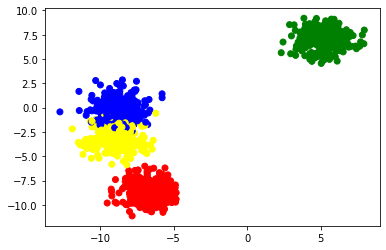

In [28]:
## Plot Data points 
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","green","blue","yellow"])
plt.scatter(attr[:,0],attr[:,1],c = labels,cmap=my_cmap)
plt.show()

In [65]:
## Split Train & Test 
X_train,X_test,Y_train,Y_test = train_test_split(attr,labels,random_state=1,stratify=labels)
print(X_train.shape,Y_train.shape)

(750, 2) (750,)


In [66]:
## Hot Encode the Labels 
enc = OneHotEncoder()
Y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
print(Y_OH_train.shape)
Y_OH_test = enc.fit_transform(np.expand_dims(Y_test,1)).toarray()
print(Y_OH_test.shape)

(750, 4)
(250, 4)


# MULTI CLASS SPECIFIC

In [0]:
class FFSN_MultiClass_Specific:
  
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.w7 = np.random.randn()
    self.w8 = np.random.randn()
    self.w9 = np.random.randn()
    self.w10 = np.random.randn()
    self.w11 = np.random.randn()
    self.w12 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
    self.b6 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    # input layer
    self.x1, self.x2 = x
    
    # hidden layer
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    
    # output layer
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.a5 = self.w9*self.h1 + self.w10*self.h2 + self.b5
    self.a6 = self.w11*self.h1 + self.w12*self.h2 + self.b5
    sum_exps = np.sum([np.exp(self.a3), np.exp(self.a4), np.exp(self.a5), np.exp(self.a6)])
    self.h3 = np.exp(self.a3)/sum_exps
    self.h4 = np.exp(self.a4)/sum_exps
    self.h5 = np.exp(self.a5)/sum_exps
    self.h6 = np.exp(self.a6)/sum_exps
    
    return np.array([self.h3, self.h4, self.h5, self.h6])
  
  def grad(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3, self.y4 = y
    
    self.dw5 = (self.h3-self.y1) * self.h1 
    self.dw6 = (self.h3-self.y1) * self.h2
    self.db3 = (self.h3-self.y1)
                    
    self.dw7 = (self.h4-self.y2) * self.h1
    self.dw8 = (self.h4-self.y2) * self.h2
    self.db4 = (self.h4-self.y2)
    
    self.dw9 = (self.h5-self.y3) * self.h1
    self.dw10 = (self.h5-self.y3) * self.h2
    self.db5 = (self.h5-self.y3)
    
    self.dw11 = (self.h6-self.y4) * self.h1
    self.dw12 = (self.h6-self.y4) * self.h2
    self.db6 = (self.h6-self.y4)
                    
    self.dh1 = (self.h3-self.y1)*self.w5 + (self.h4-self.y2)*self.w7 + (self.h5-self.y3)*self.w9 + (self.h6-self.y4)*self.w11
    self.dw1 = self.dh1 * self.h1*(1-self.h1) * self.x1
    self.dw2 = self.dh1 * self.h1*(1-self.h1) * self.x2
    self.db1 = self.dh1 * self.h1*(1-self.h1)
                    
    self.dh2 = (self.h3-self.y1)*self.w6 + (self.h4-self.y2)*self.w8 + (self.h5-self.y3)*self.w10 + (self.h6-self.y4)*self.w12
    self.dw3 = self.dh2 * self.h2*(1-self.h2) * self.x1
    self.dw4 = self.dh2 * self.h2*(1-self.h2) * self.x2
    self.db2 = self.dh2 * self.h2*(1-self.h2)
    
  def grad_short(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3, self.y4 = y
    
    self.da3 = (self.h3-self.y1)
    self.da4 = (self.h4-self.y2)
    self.da5 = (self.h5-self.y3)
    self.da6 = (self.h6-self.y4)
    
    self.dw5 = self.da3*self.h1
    self.dw6 = self.da3*self.h2
    self.db3 = self.da3
    
    self.dw7 = self.da4*self.h1
    self.dw8 = self.da4*self.h2
    self.db3 = self.da4
    
    self.dw9 = self.da5*self.h1
    self.dw10 = self.da5*self.h2
    self.db3 = self.da5
    
    self.dw11 = self.da6*self.h1
    self.dw12 = self.da6*self.h2
    self.db3 = self.da6
    
    self.dh1 = self.da3*self.w5 + self.da4*self.w7 + self.da5*self.w9 + self.da6*self.w11
    self.dh2 = self.da3*self.w6 + self.da4*self.w8 + self.da5*self.w10 + self.da6*self.w12
    
    self.da1 = self.dh1 * self.h1*(1-self.h1)
    self.da2 = self.dh2 * self.h2*(1-self.h2)
    
    self.dw1 = self.da1*self.x1
    self.dw2 = self.da1*self.x2
    self.db1 = self.da1
    
    self.dw3 = self.da2*self.x1
    self.dw4 = self.da2*self.x2
    self.db2 = self.da2
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False, display_weight=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6  = [0]*18
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db1 += self.db4
        db2 += self.db5
        db3 += self.db6
        
      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.w7 -= learning_rate * dw7 / m
      self.w8 -= learning_rate * dw8 / m
      self.w9 -= learning_rate * dw9 / m
      self.w10 -= learning_rate * dw10 / m
      self.w11 -= learning_rate * dw11 / m
      self.w12 -= learning_rate * dw12 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      self.b4 -= learning_rate * db4 / m
      self.b5 -= learning_rate * db5 / m
      self.b6 -= learning_rate * db6 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
        
      if display_weight:
        weight_matrix = np.array([[self.b3, self.w5, self.w6, 
                                   self.b4, self.w7, self.w8, 
                                   self.b5, self.w9, self.w10, 
                                   self.b6, self.w11, self.w12], 
                                  [0, 0, 0,
                                   self.b1, self.w1, self.w2,
                                   self.b2, self.w3, self.w4, 
                                   0, 0, 0]])
        weight_matrices.append(weight_matrix)
    loss_values_list = list(loss.values())
    if display_loss:
      plt.plot(loss_values_list)
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:125: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


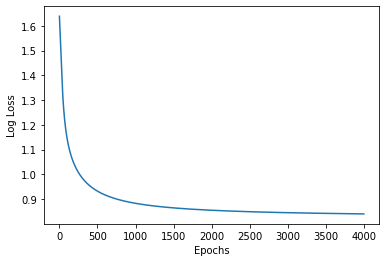

In [19]:
## Training ##
## Defining a global variable "weight_matrices" for string the updated weights & Bias after each epoch

weight_matrices = []
ffsn_multi_specific = FFSN_MultiClass_Specific()
ffsn_multi_specific.fit(X_train,Y_OH_train,epochs=4000,learning_rate=0.05,display_loss=True, display_weight=True)

# POST ANALYSIS - Heat Map #

In [0]:
my_cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","green","blue"])


In [0]:
def heat_map(epoch):
  fig = plt.figure(figsize=(10,1))
  sns.heatmap(weight_matrices[epoch],vmin=-1,vmax=3,cmap=my_cmap1,linewidths=1,annot=True)
  plt.title("Epoch"+str(epoch))
  fig.canvas.draw()
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
  image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

  return image

In [0]:
imageio.mimsave('./weights_for_MultiClass_classify.gif',[heat_map(i) for i in range(0,len(weight_matrices),len(weight_matrices)//50)],fps=1)

In [0]:
fig = plt.figure(figsize=(10,10))
for i in range(5):
  x = np.linspace(i,i+2,10)
  y = x**2
  # plt.plot(x,y,"*")
  # fig.canvas.draw()
  # image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
  # image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
  # print(image.shape)
  # time.sleep(5)
  # plt.show()

In [18]:
## Testing Accuracy ##
Y_pred_train = ffsn_multi_specific.predict(X_train)
#print(Y_pred_train[100:120])
Y_pred_train = np.argmax(Y_pred_train,1)
#print(Y_pred_train)

accuracy_train = accuracy_score(Y_pred_train, Y_train)
print(accuracy_train)

0.512


In [0]:
np.c_[np.array([1,2,3,4]),np.array([5,6,7,8])]
np.c_[np.array([0,0,0]),np.array([1,2,3])]
#c = np.c_[a]
#print(c)

In [0]:
def  make_meshgrid(*args,h=.2):
  temp_list = []
  for arg in args:
    x_min,x_max = arg.min() - 0.5, arg.max() + 0.5
    temp_list.append((x_min,x_max))
  print(temp_list)

  temp_dict = {}
  for ind,each_min_max in enumerate(temp_list):
    temp_dict[ind] = np.arange(each_min_max[0],each_min_max[1],h).ravel()
  
  #print(temp_dict)
  all_xs = list(temp_dict.values())
  ssup = np.meshgrid(all_xs)
  return ssup
 
# def plot_contour(meshed_grids):
#   print(np.c_[meshed_grids].T)
#   0/0

ret = make_meshgrid(X_train[:,0],X_train[:,1])
print(ret)
#plot_contour(ret)




In [0]:
a = [np.array([1,2,3,4]),np.array([1,2,3,4]),np.array([1,2,3,4])]
print(a)
np.c_[a].T

In [0]:
np.c_[np.array([1,2,3,4]),np.array([1,2,3,4]),np.array([1,2,3,4])]
#print(a.shape)

In [26]:
a = np.random.rand(3,3)
print(a)
b = np.sum(a,axis = 0)
print(b.shape)
c= b.reshape(-1,1)
print(c.shape)

[[0.35825307 0.98146454 0.74309366]
 [0.5580067  0.42750342 0.1131698 ]
 [0.07694076 0.90167799 0.06786783]]
(3,)
(3, 1)


# FFNN _ VECTORIZATION

In [0]:
W1 = np.random.randn(2,2)
W2 = np.random.randn(2,4)

In [0]:
class FF_MultiClass_Vectorized:
  def __init__(self,W1,W2):
    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,4))
  
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))

  def softmax(self,x):
    exps = np.exp(x)
    return exps/np.sum(exps,axis=1).reshape(-1,1)
  
  def forward_pass(self,X):
    self.A1 = np.matmul(X,self.W1) + self.B1    # (N,2) * (2,2) ->(1,2) -> (N,2)
    self.H1 = self.sigmoid(self.A1)   # (N,2)

    self.A2 = np.matmul(self.H1,self.W2) + self.B2  # (N,2) * (2,4) -> (N,4)
    self.H2 = self.softmax(self.A2)   # (N,4)
    return self.H2

  def grad_sigmoid(self,X):
    return X*(1-X)


  def grad(self,X,Y):
    self.forward_pass(X)

    self.dA2 = self.H2-Y # (N,4) - (N,4) -> (N,4)

    self.dW2 = np.matmul(self.H1.T,self.dA2) # (2,N)*(N,4)->(2,4)
    self.dB2 = np.sum(self.dA2,axis=0).reshape(1,-1) # (1,4)

    self.dH1 = np.matmul(self.dA2,self.W2.T)  # (N,4),(4,2) ->(N,2) 
    self.dA1 = np.multiply(self.dH1,self.grad_sigmoid(self.H1)) # (N,2)*(N*2)->(N,2) [Element-wise]

    self.dW1 = np.matmul(X.T,self.dA1)  # (2,N)*(N,2) ->(2,2)
    self.dB1 = np.sum(self.dA1,axis =0).reshape(1,-1) # (1,2)


  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False, display_weight=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      self.grad(X,Y)
      m = X.shape[0]
      self.W1 -= learning_rate * (self.dW1 / m)
      self.W2 -= learning_rate * (self.dW2 / m)
      self.B1 -= learning_rate * (self.dB1 / m)
      self.B2 -= learning_rate * (self.dB2 / m)
      
      # print("Epoch",i)
      # print("self.W1",self.W1)
      # print("self.W2",self.W2)
      # print("self.B1",self.B1)
      # print("self.B2",self.B2)
      # print("*"*100)

      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
        
      if display_weight:
        weight_matrix = np.array([[self.b3, self.w5, self.w6, 
                                   self.b4, self.w7, self.w8, 
                                   self.b5, self.w9, self.w10, 
                                   self.b6, self.w11, self.w12], 
                                  [0, 0, 0,
                                   self.b1, self.w1, self.w2,
                                   self.b2, self.w3, self.w4, 
                                   0, 0, 0]])
        weight_matrices.append(weight_matrix)

    loss_val_list = list(loss.values())
    if display_loss:
      plt.plot(loss_val_list)
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = self.forward_pass(X)
    return np.array(Y_pred).squeeze()

# TRAINING 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


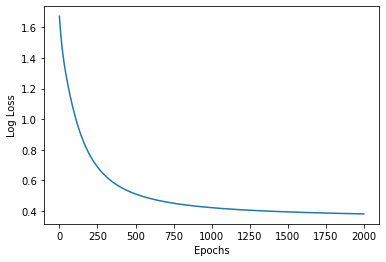

In [71]:
obj = FF_MultiClass_Vectorized(W1,W2)
obj.fit(X_train,Y_OH_train,epochs=2000,learning_rate=0.1,display_loss=True,display_weight=False)

# Testing

In [72]:
Y_pred_train = obj.predict(X_train)
Y_pred_vals_train = np.argmax(Y_pred_train,axis=1)

Y_pred_test = obj.predict(X_test)
Y_pred_vals_test = np.argmax(Y_pred_test,axis=1)

train_accuracy = accuracy_score(Y_pred_vals_train,Y_train)
test_accuracy = accuracy_score(Y_pred_vals_test,Y_test)

print("train_accuracy",train_accuracy)
print("test accuracy",test_accuracy)

train_accuracy 0.78
test accuracy 0.78


In [0]:
my_cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green","cyan"])

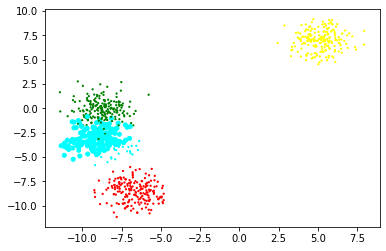

In [77]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=my_cmap2, s=15*(np.abs(np.sign(Y_pred_vals_train-Y_train))+.1))
plt.show()

In [0]:
a = np.array([1,2,3,4])
exps = np.exp(a)
print(exps)
summ = np.sum(exps,axis=0)
print(summ)
ret = exps/summ
print(ret)
ret = ret.reshape(1,-1)
print(ret.shape)
0/0
ret = obj.softmax(a)
ret = ret.reshape(1,-1)
print(ret.shape)
